<a href="https://colab.research.google.com/github/ThisIsJorgeLima/ThisIsJorgeLima.github.io/blob/master/JAL_DS10_Unit_1_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 - Load and validate the data**

*  Load the data as a pandas data frame.
*  Validate that it has the appropriate number of observations (checking the       raw file, and also read the dataset description from data.world [Netflix](https://data.world/chasewillden/netflix-shows/workspace/file?filename=netflix.xlsx) ).






In [0]:
# Let's begin by importing pandas
# We also imported numpy, matplotlib, and seaborn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [100]:
from google.colab import files
files.upload()

{}

In [454]:
# We use the !head method, which by default prints out raw data. 
!head netflix-netflix-shows-QueryResult.csv

title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
White Chicks,PG-13,"crude and sexual humor, language and some drug content",80,2004,82,80
Lucky Number Slevin,R,"strong violence, sexual content and adult language",100,2006,,82
Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2016,98,80
Prison Break,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2008,98,80
How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitable for all children.,70,2014,94,80
Supernatural,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2016,95,80
Breaking Bad,TV-MA,For mature audiences.  May not be suitable for children 17 and under.,110,2013,97,80
The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2017,91,80
The Walking Dead,TV-MA,For mature audiences.  May not be suitable

In [456]:
# We use the !tail method, which by default prints out raw data. 
!tail netflix-netflix-shows-QueryResult.csv

My Animal Friends,TV-Y,Suitable for all ages.,10,2013,,82
Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,41,2017,72,80
Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,35,2016,,82
Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,,82
Pup Star,G,General Audiences. Suitable for all ages.,35,2016,,82
The BFG,PG,"for action/peril, some scary moments and brief rude humor",60,2016,97,80
The Secret Life of Pets,PG,for action and some rude humor,60,2016,,81
Precious Puppies,TV-G,Suitable for all ages.,35,2003,,82
Beary Tales,TV-G,Suitable for all ages.,35,2013,,82
Growing Up Wild,G,,35,2016,80,80


In [0]:
# Looking at the Help Documentation 
?pd.read_csv

In [458]:
# We use the pandas method pandas.read_csv("filepath") to create a DataFrame 
# and assign it to a variable df.
# We'll use the head() method, which by default prints out the first 5 rows. 
# We're supposed to have 1000 observations (rows) and seven columns. 

pd.options.display.max_rows=999
pd.options.display.max_columns=100

df=pd.read_csv("netflix-netflix-shows-QueryResult.csv")

df.replace("?", np.NaN)
print(df.shape)
df.head()

(1000, 7)


,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [459]:
# Then the tail method. Also for the last 5 values.
df.tail()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82
999,Growing Up Wild,G,NaN,35,2016,80.0,80


# **Data Exploration**

In [460]:
df.dtypes

title                 object
rating                object
ratinglevel           object
ratingdescription      int64
release_year           int64
user_rating_score    float64
user_rating_size       int64
dtype: object

In [461]:
# Here we can see the breakdown of the count, mean, std, min, and percentile by 25%,50%,75%
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [462]:
# A great way to get an overview of our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratinglevel          941 non-null object
ratingdescription    1000 non-null int64
release_year         1000 non-null int64
user_rating_score    605 non-null float64
user_rating_size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


Rating Level and User rating score are missing values...


In [463]:
# Checking to see if they're any duplicate titles:
df['title'].value_counts().head()


13 Reasons Why         8
Girlboss               7
Prison Break           7
Pretty Little Liars    6
Dinotrux               6
Name: title, dtype: int64

In [472]:
# more indepth evaluation:
titles = df['title'].value_counts().iloc[0:4].keys()
df[df['title'].isin(titles)]

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
119,Skins,TV-MA,For mature audiences. May not be suitable for...,110,2013,NaN,82
128,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,86.0,80
135,Skins,TV-MA,NaN,110,2017,NaN,82
257,Bordertown,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82
269,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",60,2008,57.0,80
276,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,93.0,80
321,Goosebumps,TV-Y7,Suitable for children ages 7 and older,41,1998,88.0,80
366,Goosebumps,PG,"scary and intense creature action and images, ...",60,2015,90.0,80


In [473]:
# By doing the value counts. In this specific column 'ratings'
# The breakdown from acceding to descending 
df.rating.value_counts()

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

In [474]:
df['user_rating_score'].value_counts()

98.0    12
97.0    12
96.0    12
95.0    11
91.0    11
88.0     9
93.0     9
81.0     9
94.0     8
85.0     8
92.0     8
79.0     8
84.0     7
90.0     7
61.0     7
74.0     7
80.0     7
77.0     7
89.0     7
57.0     6
83.0     6
82.0     6
86.0     6
70.0     5
64.0     5
68.0     5
71.0     5
56.0     5
73.0     4
69.0     4
67.0     4
63.0     4
62.0     4
58.0     4
72.0     3
78.0     3
66.0     3
55.0     2
75.0     2
65.0     2
59.0     1
99.0     1
Name: user_rating_score, dtype: int64

In [475]:
# nulls as missing values. 
# We'll subset our data by choosing ALL the rows that have missing values.

print('The number of rows with Missing Values are: ')
df.isnull().any(axis=1).sum()

The number of rows with Missing Values are: 


254

In [476]:
# Lets take a look at verifying top ratings by User_Rating_Score by mean:
df=df.fillna(value=0,axis=1)
df=df[df['rating']!='UR']
df.groupby('rating')['user_rating_score'].mean().sort_values()

rating
NR          15.400000
TV-Y        16.666667
TV-Y7       19.956522
TV-Y7-FV    23.280000
G           26.679245
TV-G        28.206897
TV-MA       41.378049
R           42.642857
PG          53.118421
TV-PG       53.333333
PG-13       53.583333
TV-14       60.198113
Name: user_rating_score, dtype: float64

In [478]:
# We're supposed to have 1000 observations (rows) and seven columns. 
# Since we dropped duplicates. Let's check:
# Now we have 499 rows and seven columns

df=df.drop_duplicates(keep="first").reset_index(drop=True)
print(df.shape)
df.head()

(499, 7)


,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [479]:
# double checking to see if all duplicates were removed:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
title                499 non-null object
rating               499 non-null object
ratinglevel          499 non-null object
ratingdescription    499 non-null int64
release_year         499 non-null int64
user_rating_score    499 non-null float64
user_rating_size     499 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.4+ KB


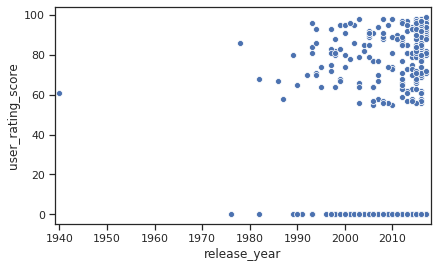

In [480]:
# Lets now find out the number of release years:
sns.scatterplot(data=df, y='user_rating_score', x='release_year')
plt.xlim(1939, 2018)
plt.show()

From the data above. There does not appear be a correlation between the release dates and user rating score.



In [481]:
# Lets find out the total of number of release years in Netflix library: 
print('There are a total of',df['release_year'].nunique(),'years in the dataset: ',df['release_year'].unique())

There are a total of 35 years in the dataset:  [2004 2006 2016 2008 2014 2013 2017 2015 2011 2009 2007 2003 2012 2001
 2010 1998 1999 1978 2005 1993 2002 1976 1989 1996 1997 2000 1994 1982
 1990 1940 1986 1995 1991 1992 1987]


In [482]:
#use this function: df_ratings=df['rating'].unique()
# Total number of categorical ratings:

print('Within this dataset, there are',df['rating'].nunique(),
      'associated ratings that ranging from: ',df['rating'].unique())

Within this dataset, there are 12 associated ratings that ranging from:  ['PG-13' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-Y' 'NR' 'PG' 'TV-Y7-FV' 'TV-G'
 'G' 'TV-Y7']


In [484]:
# Here we are verifing the amount of content in this Netflix dataset 
print('The number of Netflix content in this dataset:',df['title'].nunique())

The number of Netflix content in this dataset: 495


Rating system from [Netflix](https://help.netflix.com/en/node/2064) website indicates how the audience is broken down by rating:

*   **Little Kids** G,TV-Y,TV-G
*   **Older Kids** PG,TV-Y7,TV-Y7-FV,TV-PG
*   **Teens** PG-13, TV-14
*   **Mature** R,NC-17,TV-MA

other source: [Film Ratings](https://www.filmratings.com/)







In [485]:
# Lets make an audience column to show ratings by individualities:
# We are feature engineering  
# It took me awhile to figure out this function:ds
def audience(rating):
    Little_Kids = ['G','TV-Y','TV-G']
    Older_Kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
    Teens = ['PG-13', 'TV-14']
    Adult = ['R', 'NC-17', 'NR', 'UR', 'TV-MA']
    
    if rating in Little_Kids:
        return 'Little Kids'
    elif rating in Older_Kids:
        return 'Older Kids'
    elif rating in Teens:
        return 'Teens'
    elif rating in Adult:
        return 'Adults'
    else:
        return 'Missing'
    
df['audience'] = df['rating'].apply(audience)
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size,audience
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Teens
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,Adults
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,Teens
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,Teens
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,Older Kids


In [486]:
# crosstab of title and ausience with user rating score values
# finding out the the mean via aggfunc.

pd.crosstab(df.title, df.audience, values=df.user_rating_score, aggfunc='mean').round(0)


audience,Adults,Little Kids,Older Kids,Teens
title,,,,
0.03,0.0,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,68.0
100 Metros,0.0,NaN,NaN,NaN
13 Reasons Why,99.0,NaN,NaN,NaN
30 Rock,NaN,NaN,NaN,66.0
5 to 7,0.0,NaN,NaN,NaN
90210,NaN,NaN,NaN,62.0
A Monster in Paris,NaN,NaN,0.0,NaN
A Weekend with the Family,0.0,NaN,NaN,NaN


In [487]:
# Here I made a crosstab to compare and contrast user_rating_score to titles:
# Researching the data to figure out the thesis for my project.

pd.crosstab(df['user_rating_score'], df['title'])

title,0.03,10 Things I Hate About You,100 Metros,13 Reasons Why,30 Rock,5 to 7,90210,A Monster in Paris,A Weekend with the Family,Absolutely Fabulous,Abstract: The Art of Design,Agent F.O.X.,Air Bud: Spikes Back,Air Bud: World Pup,Air Buddies,Alice Through the Looking Glass,All Hail King Julien,Almost Adults,Alpha and Omega: Dino Digs,American Crime,American Crime Story: The People v. O.J. Simpson,American Horror Story,American Odyssey,Amy Schumer: The Leather Special,An American Tail,An American Tail: Fievel Goes West,An American Tail: The Mystery of the Night Monster,An Extremely Goofy Movie,Anastasia,Angry Birds,Animaniacs,Annie,Antz,Aquarius,Army Wives,Arrow,Ask the StoryBots,Atlantis: Milo's Return,Atlantis: The Lost Empire,Axel: The Biggest Little Hero,Babe: Pig in the City,Baby Daddy,Baby's Day Out,Back and Forth,Back to the Secret Garden,Balto,Balto 2: Wolf Quest,Barbie Life in the Dreamhouse,Batched,Bates Motel,...,The Secret Life of Pets,The Secret Life of the American Teenager,The Seven Deadly Sins,The Smurfs and the Magic Flute,The Super Mario Bros. Super Show!,The Three Musketeers,The Tudors,The Vampire Diaries,The Very Hungry Caterpillar and Other Stories,The Walking Dead,The Waterboy,The Wedding Party,The Wedding Planner,The West Wing,Thomas & Friends: King of the Railway,Thomas & Friends: Thomas & the Runaway Kite,Thunder and the House Of Magic,Touch,Tramps,Transformers Prime,Transformers Prime Beast Hunters: Predacons Rising,Transformers: Rescue Bots,Transformers: Robots in Disguise,Transporter: The Series,Travelers,Trollhunters,Trouble with the Curve,Twilight,Unbreakable Kimmy Schmidt,Unconditional,Underdogs,VeggieTales in the House,Velvet,Voltron: Legendary Defender,Walt Disney Animation Studios Short Films Collection,We're Back! A Dinosaur's Story,Weeds,White Chicks,White Collar,Wiener Dog Internationals,Win It All,Winnie the Pooh: Springtime with Roo,Witches of East End,Word Party,Worms,Yellowbird,Young Justice,Zoobabu,Zootopia,"Ã“ Pai, Ã“ - Look at This"
user_rating_score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,...,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1
55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [488]:
# Here is a function that was utilized to get a better understanding
# of the rated shows by the audience's age to better understand the data
# This function is ascending the highest-rated shows by groups rating:

order = ['Little Kids','Older Kids','Teens','Adults']

for group in order:
    print('\n' + group+':')
    print('Highest')
    print(df[df['audience']==group].sort_values('user_rating_score',ascending=False)[['title','user_rating_score']].head(1))
    print('----------------------------------------')
    print('\nLowest')
    print(df[df['audience']==group].sort_values('user_rating_score')[['title','user_rating_score']].head(1))
    print('----------------------------------------')
    print('Highest to lowest user rated shows by an Audience age:')



Little Kids:
Highest
                                      title  user_rating_score
395  Homeward Bound: The Incredible Journey               96.0
----------------------------------------

Lowest
                    title  user_rating_score
15  Lottie Dottie Chicken                0.0
----------------------------------------
Highest to lowest user rated shows by an Audience age:

Older Kids:
Highest
               title  user_rating_score
10  Once Upon a Time               98.0
----------------------------------------

Lowest
               title  user_rating_score
494  Russell Madness                0.0
----------------------------------------
Highest to lowest user rated shows by an Audience age:

Teens:
Highest
          title  user_rating_score
3  Prison Break               98.0
----------------------------------------

Lowest
      title  user_rating_score
221  Velvet                0.0
----------------------------------------
Highest to lowest user rated shows by an Audience age

# **Visualizations**

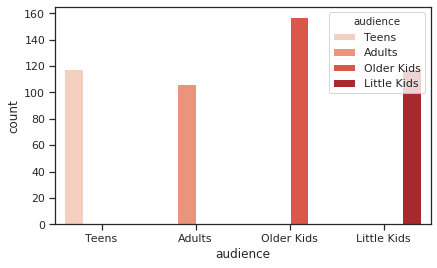

In [489]:
# Here is a count plot to show a visual of the audience
sns.countplot(x="audience", hue="audience",palette="Reds", data=df)
plt.show()

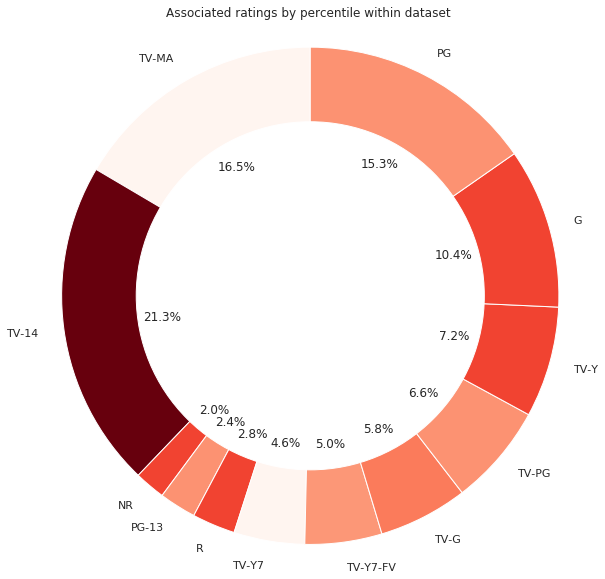

In [491]:
# Associated ratings by percentile within dataset
# Donut Chart

df.rating.value_counts().plot
labels = ['TV-MA', 'TV-14', 'NR', 'PG-13','R','TV-Y7','TV-Y7-FV','TV-G',
          'TV-PG','TV-Y','G','PG']
sizes = [16.5, 21.3, 2, 2.4,2.8,4.6,5.0,5.8,6.6,7.2,10.4,15.3]

#colors
colors = ['#fff5f0','#67000d','#f14331','#fc9272','#f14331','#fff5f0',
          '#fc9777','#fb7b5b','#fc9272','#f14331','#f14331','#fc9272']


 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white',)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(8,8)
# create a figure and set different background
fig.patch.set_facecolor('white')


# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

plt.title('Associated ratings by percentile within dataset')


plt.show()

Top five **Ratings** in this dataset are:

1.   Rated TV-14
2.   Rated TV-MA
3.   Rated PG
4.   Rated G
5.   Rated TV-Y


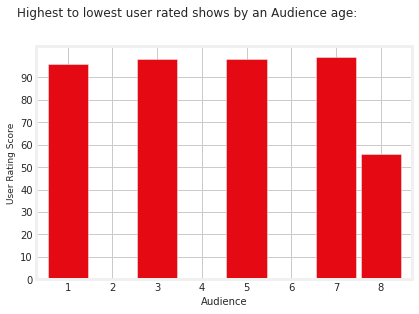

In [492]:
new_chart = pd.Series([96,0,98,0,98,0,99,56], 
                 index=range(0,8))


# Set stylesheet
plt.style.use('fivethirtyeight')

# Figure axes syntax
fig, ax = plt.subplots()

###Colors###
# figure background color white
fig.patch.set(facecolor='white')

# bar colors
# bars on the axes:
# Netflix Red:#E50914
new_chart.plot.bar(width=0.9, color='#E50914')

# axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("Highest to lowest user rated shows by an Audience age:", fontsize=12, fontweight='normal', x=.40, y=1.1) 

# Set plot ylabel
ax.set_ylabel('User Rating Score', fontsize=9, fontweight='normal')

# Set plot xlabel
ax.set_xlabel(['Homeward Bound','Lottie Dottie Chicken','Once Upon a Time','Russell Madness',
              'Prison Break','Velvet','13 Reasons Why', 'Lucky Number Slevin'],fontsize=9)

ax.set_xlabel('Audience', fontsize=10, fontweight='normal')

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0','10','20','30','40','50','60', '70', '80', '90', '100%'], fontsize=10)
ax.set_yticks(range(0,100,10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1,10,1), rotation='horizontal', fontsize=10)

# Show the plot:
fig.show()

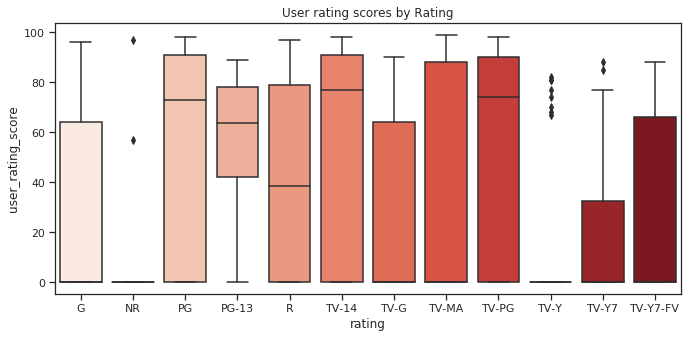

In [511]:
# User rating scores by rating
order = np.sort(df['rating'].unique())

# Plot size of figure drawn 
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y='user_rating_score', x='rating',order=order,palette="Reds")

# Plot formatting
plt.title('User rating scores by Rating')
plt.show()


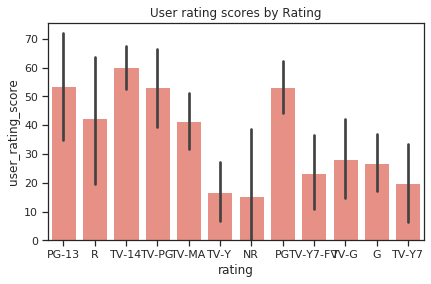

In [512]:
# User rating scores by rating

sns.barplot("rating", y="user_rating_score", data=df,
               color="salmon", saturation=.7)

# Plot formatting
plt.title('User rating scores by Rating')
plt.show()

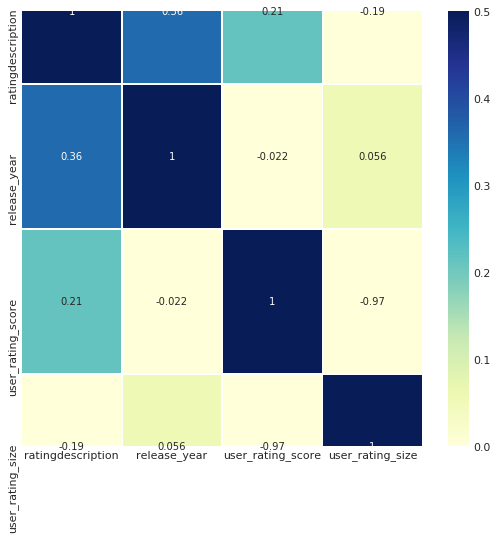

In [497]:
# Heatmap of all of the dataframe via df.corr()
# This was a test to see if I can make a heatmap
# after watching a video or two this was the outcome:
%matplotlib inline

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot =True, linewidth=0.5,cmap='YlGnBu',vmin=0, vmax=0.5)
plt.show()

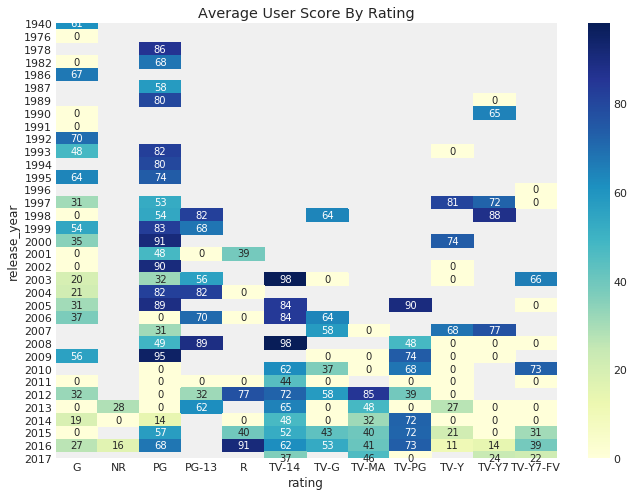

In [498]:
# Soon I'll have a heatmap from the last five years
# Netflix has most of its content from 2012-2016
# The visual will show a heatmap showing user_rating_score
# Release_year and rating 

# Top five years from 2016-2012 Avg of user Rating Scores:
plt.subplots(figsize=(10,8))
ratings=df.groupby('rating')['rating'].count()
ratings.sort_values(ascending=True,inplace=True)
shows=df[df['rating'].isin(ratings.index)]
piv=shows.groupby(['release_year','rating'])['user_rating_score'].mean().reset_index()
piv=piv.pivot('release_year','rating','user_rating_score')
sns.heatmap(piv,annot=True,cmap='YlGnBu')
plt.title('Average User Score By Rating')
plt.show()



In [499]:
# Crosstab of np.max of title and audience:

pd.crosstab([df.title],[df.audience],values=df.user_rating_score, aggfunc=np.max)

audience,Adults,Little Kids,Older Kids,Teens
title,,,,
0.03,0.0,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,68.0
100 Metros,0.0,NaN,NaN,NaN
13 Reasons Why,99.0,NaN,NaN,NaN
30 Rock,NaN,NaN,NaN,66.0
5 to 7,0.0,NaN,NaN,NaN
90210,NaN,NaN,NaN,62.0
A Monster in Paris,NaN,NaN,0.0,NaN
A Weekend with the Family,0.0,NaN,NaN,NaN


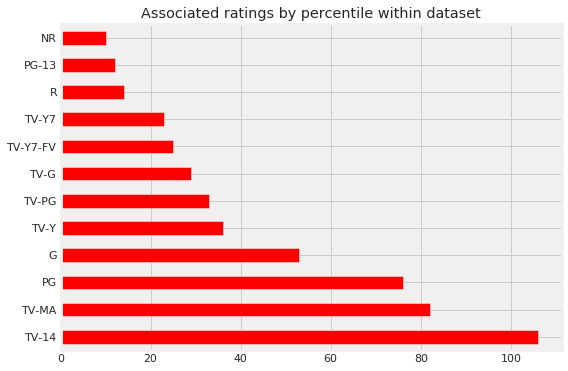

In [500]:
# Trying different ways to see which visual is most affective 
# Regards to ratings:
df['rating'].value_counts()[:20].plot(kind='barh', figsize=(8, 6),color='red')
plt.title('Associated ratings by percentile within dataset')
plt.show()


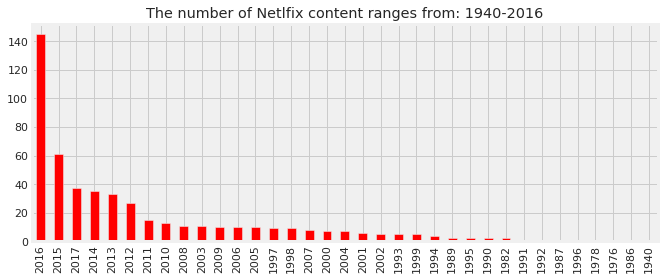

In [502]:
# Number of Netflix content over the years:

shows = df['release_year'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,4))
shows.plot(title='The number of Netlfix content ranges from: 1940-2016',kind="bar",color ='red')
plt.show()

Top five pieces of **Content** produced years in this dataset are:

1.   2016
2.   2015
3.   2014
4.   2013
5.   2012



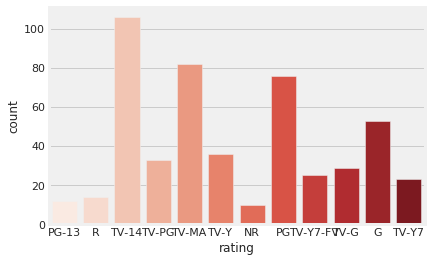

In [503]:
# Countplot of Ratings:
sns.countplot(df['rating'], palette="Reds")
plt.show()

In [504]:
# Testing to see the audience values I created during exploration is working:
df['audience'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Little Kids'], dtype=object)

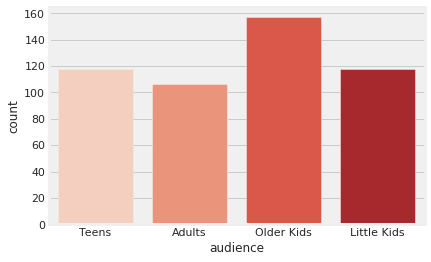

In [505]:
# Countplot of audience:
sns.countplot(x="audience", data=df, palette="Reds")
plt.show()

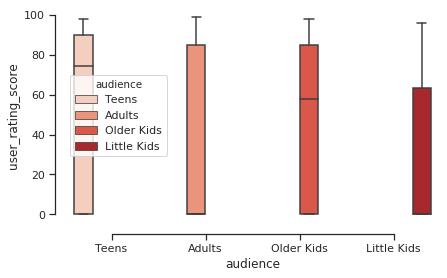

In [506]:
# Boxplot showing audience and user rating correlation:
sns.set(style="ticks")

# Draw a nested boxplot to show audience and user rating
sns.boxplot(x="audience", y="user_rating_score",
            hue="audience", palette="Reds",
            data=df)
sns.despine(offset=10, trim=True)

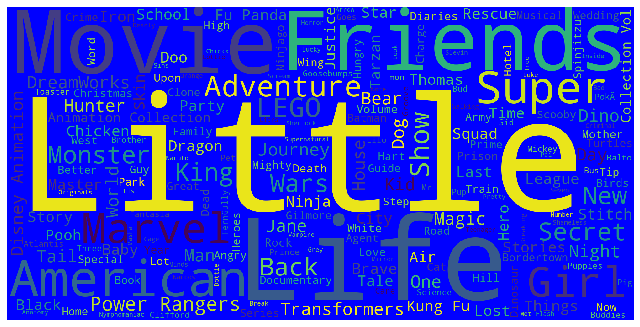

In [510]:
# Here we learned to make a word cloud!
# We used the 'title' to see and help if the ratings meet the demand within
# The Netflix library
# Here are the most popular shows: 
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10,10))

wordcloud = WordCloud(background_color="blue",mode="RGB",width=2000,height=1000).generate(" ".join(df['title']))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()